In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [3]:
sorted_metrics = workbench.sortByBestMSEDiff(path_to_mmpdf_db, ascending=False)
print(Counter([snr for snr in sorted_metrics['snr']]))

Counter({15: 1000, 10: 1000, 5: 1000, 0: 1000, -5: 1000})


## Top 10 of signals where OMP fails

In [4]:
sorted_metrics = sorted_metrics.loc[sorted_metrics['sparsity'] >= 4]
sorted_metrics = sorted_metrics.loc[sorted_metrics['snr'] == 10]
print(sorted_metrics.head(10))
ids = [id for id in sorted_metrics.head(10)['id']]
print(ids)

        id  snr  sparsity   omp-mse   mmp-mse  mse-diff
3237  3237   10         4  0.001027  0.000590  0.425321
3439  3439   10         5  0.001528  0.000963  0.369873
3562  3562   10         5  0.001175  0.000742  0.369043
3273  3273   10         4  0.001424  0.000948  0.334015
3644  3644   10         6  0.001425  0.000981  0.311566
3253  3253   10         4  0.000979  0.000697  0.287867
3463  3463   10         5  0.001839  0.001331  0.275901
3572  3572   10         5  0.000897  0.000654  0.271640
3502  3502   10         5  0.001133  0.000829  0.268181
3735  3735   10         6  0.001598  0.001172  0.266548
[3237, 3439, 3562, 3273, 3644, 3253, 3463, 3572, 3502, 3735]


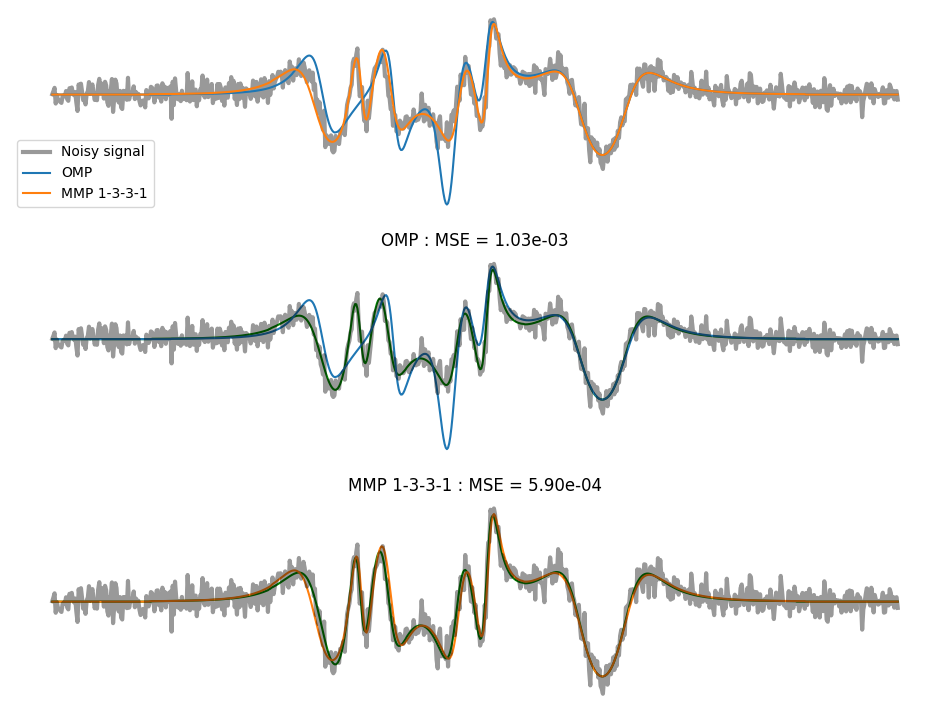

In [5]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[0])

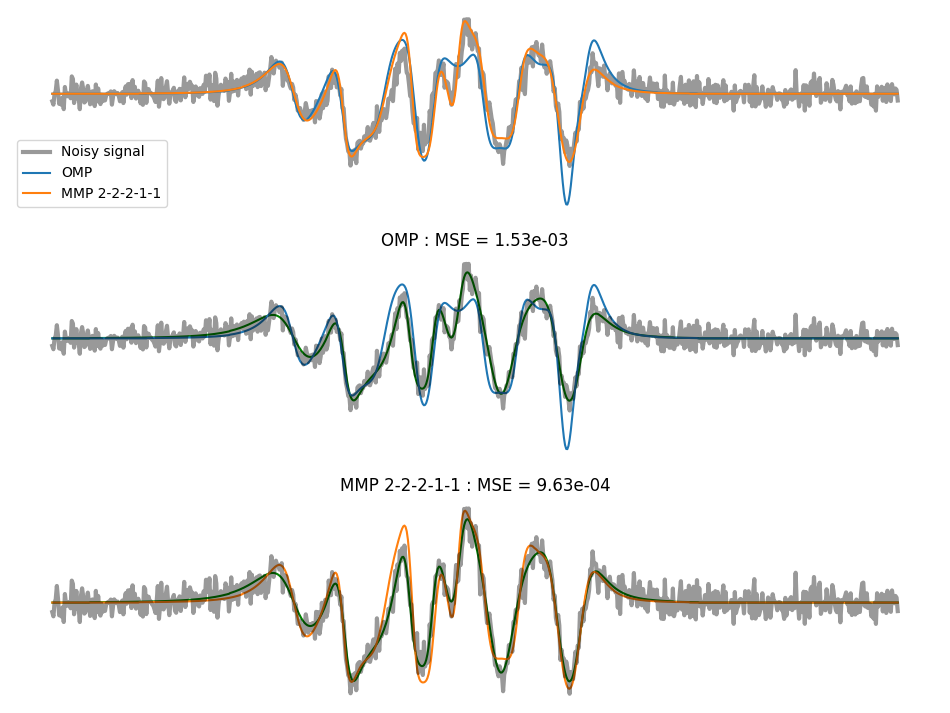

In [6]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[1])

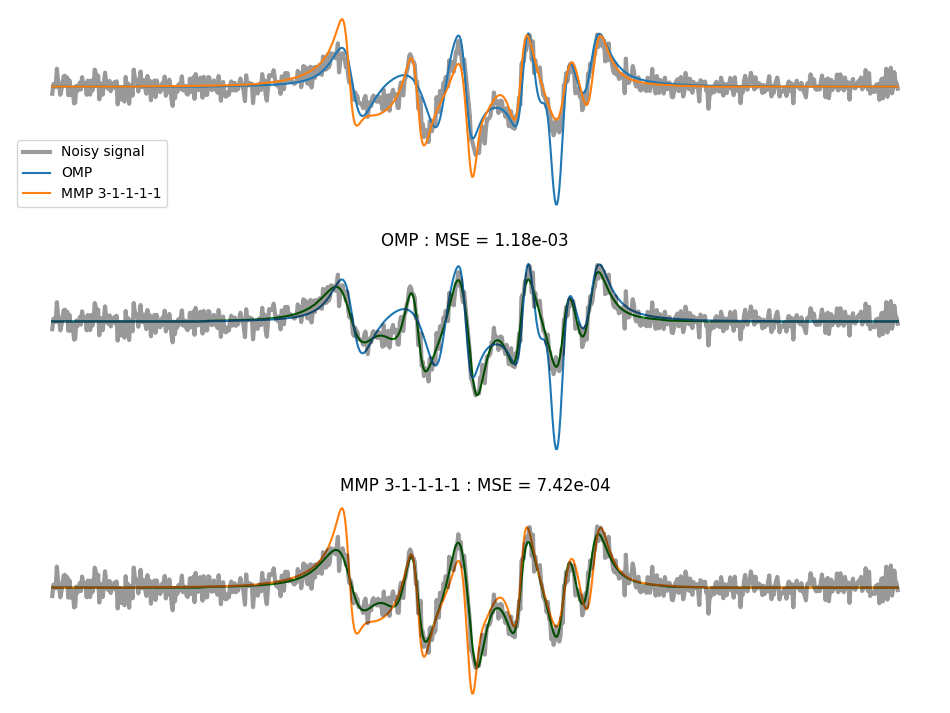

In [7]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[2])

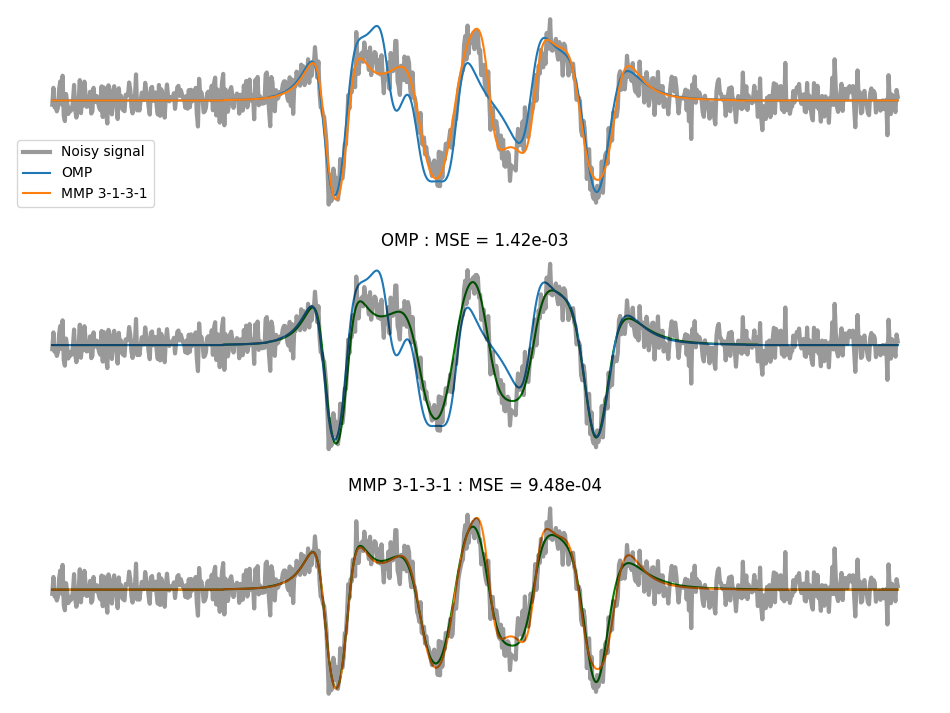

In [8]:
workbench.plotMMPComparison(mmpdf_db_path=path_to_mmpdf_db, id=ids[3])